# Info status mockup graphs

In [4]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
## simulated data:
## local/tourist/global
## before/after event
freq_data = pd.DataFrame([
    [16, 21], 
#     [15, 20], # tourist
    [0, 19]],
    columns=['before', 'after'],
    index=['local', 'non-local'])
info_data = pd.DataFrame([
    [5, 5], 
#     [15, 10], # tourist
    [20, 10]],
    columns=['before', 'after'],
    index=['local', 'non-local'])

In [49]:
## add mean series
freq_data.loc['mean', :] = freq_data.mean(axis=0)
info_data.loc['mean', :] = info_data.mean(axis=0)

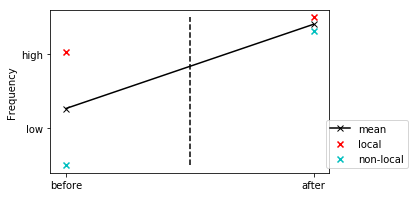

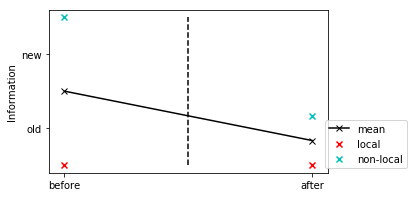

In [50]:
colors = ['r', 'c', 'k']
linestyles = [None, None, '-']
keys = ['local', 'non-local', 'mean']
data_list = [freq_data, info_data]
data_names = ['Frequency', 'Information']
y_names = [['low', 'high'], ['old', 'new']]
for i, data in enumerate(data_list):
    X = np.arange(data.shape[1])
    plt.figure(figsize=(5, 3))
    for j in range(len(keys)):
        if(linestyles[j] is None):
            plt.scatter(X, data.loc[keys[j], :], c=colors[j], label=keys[j], marker='x')
        else:
            plt.plot(X, data.loc[keys[j], :], c=colors[j], linestyle=linestyles[j], label=keys[j], marker='x')
    plt.ylabel(data_names[i])
    plt.xticks(X, data.columns)
    plt.legend(loc='lower right', bbox_to_anchor=[1.3, 0.])
    # put dashed line at midpoint
    data_min = data.min().min()
    data_max = data.max().max()
    plt.plot([X.mean(), X.mean()], [data_min, data_max], c='k', linestyle='--')
    # rename y scale to "high vs. low"
#     if(data_names[i] == 'Information'):
    data_range = data_max - data_min
    plt.yticks([data_min + data_range*.25, data_min + data_range*.75], y_names[i])
    plt.show()